In [ ]:
!pip install yfinance

import yfinance as yf

# Bitcoin
btc = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')
btc.to_csv('btc.csv')

# S&P 500
sp500 = yf.download('^GSPC', start='2020-01-01', end='2024-01-01')
sp500.to_csv('sp500.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
from google.colab import files


files.download('btc.csv')
files.download('sp500.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('btc.csv')
print(df.columns)



Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
print(btc['Close'].head())
print(sp500['Close'].head())



Price
Ticker                 BTC-USD
Date                       NaN
2020-01-01    7200.17431640625
2020-01-02    6985.47021484375
2020-01-03    7344.88427734375
Name: Close, dtype: object
Price
Ticker                    ^GSPC
Date                        NaN
2020-01-02     3257.85009765625
2020-01-03     3234.85009765625
2020-01-06    3246.280029296875
Name: Close, dtype: object


<ipython-input-7-3df2038ccc4b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  btc = pd.read_csv('btc.csv', index_col=0, parse_dates=True)
<ipython-input-7-3df2038ccc4b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)


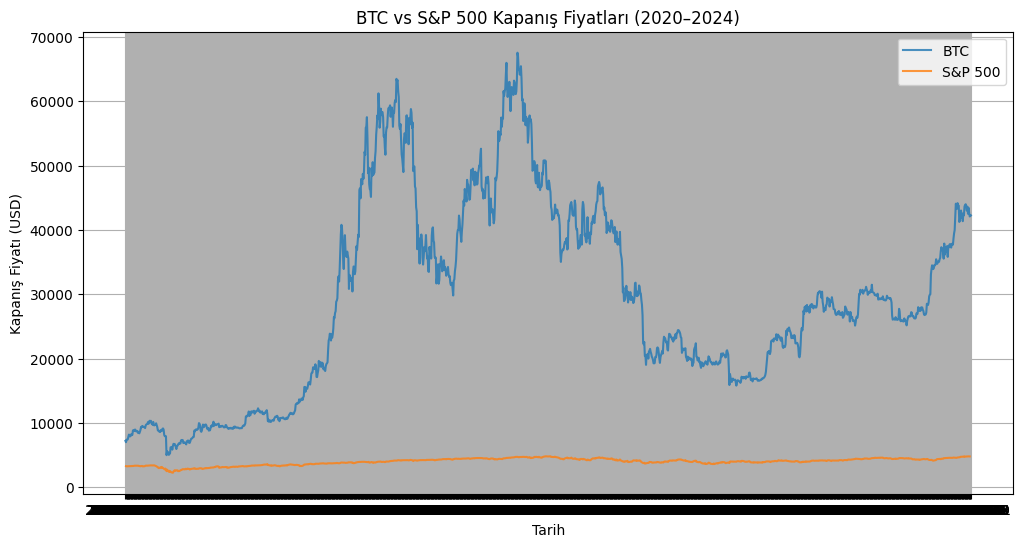

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


btc = pd.read_csv('btc.csv', index_col=0, parse_dates=True)
sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)


btc['Close'] = pd.to_numeric(btc['Close'], errors='coerce')
sp500['Close'] = pd.to_numeric(sp500['Close'], errors='coerce')


btc.dropna(subset=['Close'], inplace=True)
sp500.dropna(subset=['Close'], inplace=True)


plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label='BTC', alpha=0.8)
plt.plot(sp500['Close'], label='S&P 500', alpha=0.8)
plt.title('BTC vs S&P 500 Kapanış Fiyatları (2020–2024)')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı (USD)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-8-77eb5515c7d7>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  btc = pd.read_csv('btc.csv', index_col=0, parse_dates=True)
<ipython-input-8-77eb5515c7d7>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)


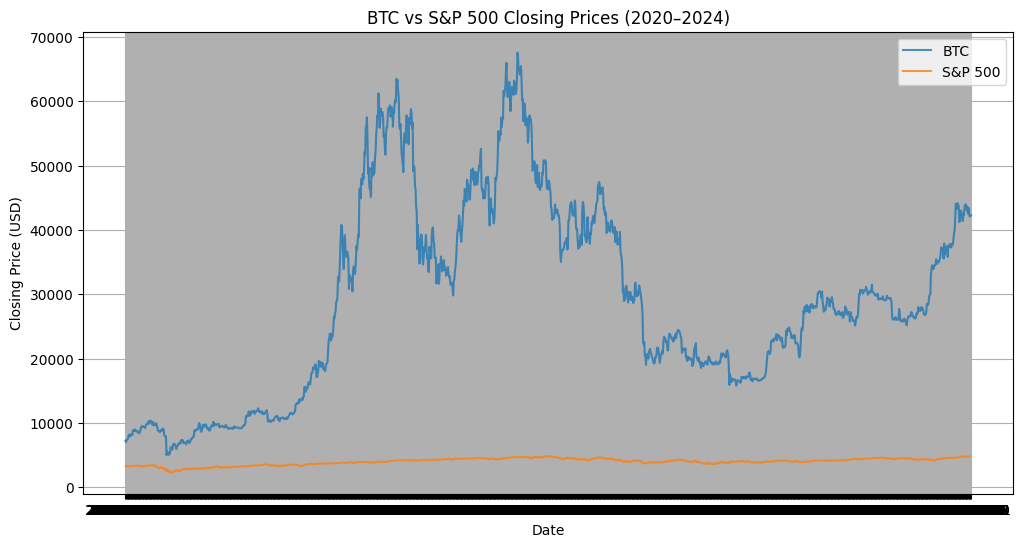

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


btc = pd.read_csv('btc.csv', index_col=0, parse_dates=True)
sp500 = pd.read_csv('sp500.csv', index_col=0, parse_dates=True)


btc['Close'] = pd.to_numeric(btc['Close'], errors='coerce')
sp500['Close'] = pd.to_numeric(sp500['Close'], errors='coerce')

btc.dropna(subset=['Close'], inplace=True)
sp500.dropna(subset=['Close'], inplace=True)


plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label='BTC', alpha=0.8)
plt.plot(sp500['Close'], label='S&P 500', alpha=0.8)
plt.title('BTC vs S&P 500 Closing Prices (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
btc['Return'] = btc['Close'].pct_change()
sp500['Return'] = sp500['Close'].pct_change()


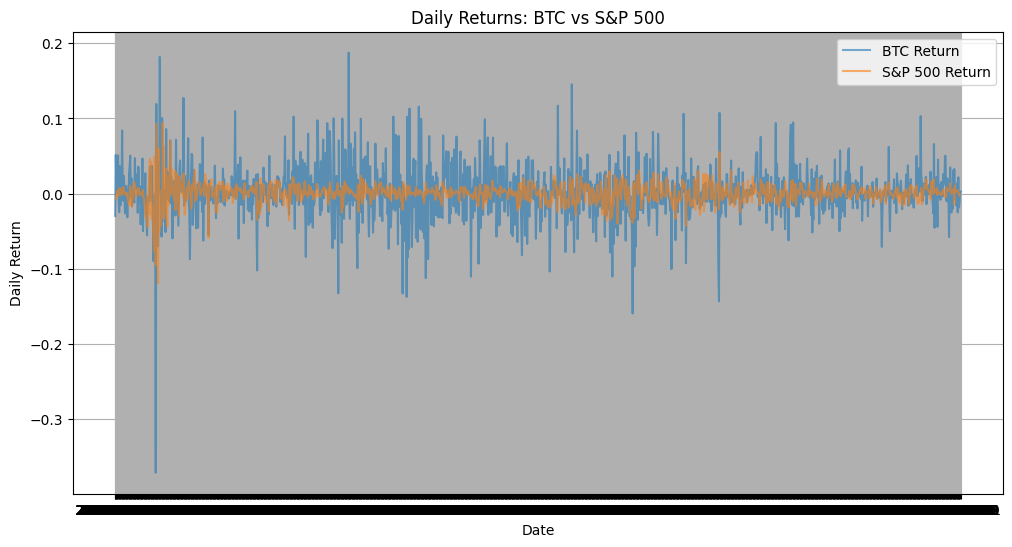

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(btc['Return'], label='BTC Return', alpha=0.6)
plt.plot(sp500['Return'], label='S&P 500 Return', alpha=0.6)
plt.title('Daily Returns: BTC vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
combined = pd.concat([btc['Return'], sp500['Return']], axis=1)
combined.columns = ['BTC', 'SP500']
combined.dropna(inplace=True)


correlation = combined.corr().iloc[0,1]
print(f"Correlation between BTC and S&P 500 returns: {correlation:.4f}")


Correlation between BTC and S&P 500 returns: 0.3855


In [ ]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(combined['BTC'], combined['SP500'])
print(f"Pearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation: 0.3855
P-value: 0.0000


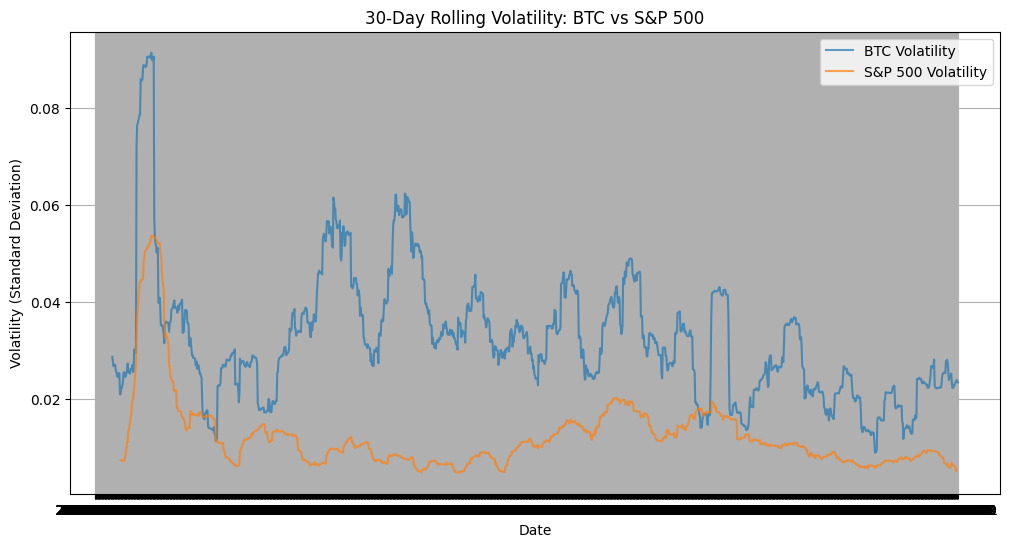

In [ ]:
## VOLATILITY ANALYSIS

btc['Volatility'] = btc['Return'].rolling(window=30).std()
sp500['Volatility'] = sp500['Return'].rolling(window=30).std()


plt.figure(figsize=(12,6))
plt.plot(btc['Volatility'], label='BTC Volatility', alpha=0.7)
plt.plot(sp500['Volatility'], label='S&P 500 Volatility', alpha=0.7)
plt.title('30-Day Rolling Volatility: BTC vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()
